<a href="https://colab.research.google.com/github/yasuhide0802/Omnipotent-computer/blob/main/The_Quantum_of_fees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2022 The Cirq Developers

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Circuits

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/build/circuits"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/main/docs/build/circuits.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/main/docs/build/circuits.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/build/circuits.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

In [ ]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq

    print("installed cirq.")

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.0 MB/s eta 0:00:00
     ━

In [ ]:
# prompt: nblab

!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter serverextension enable voila --py --sys-prefix
!jupyter labextension install voila
!pip install jupyterlab-widgets


Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir] [--paths] [--json]
               [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Availa

In [ ]:
# prompt: xmind-sdk

!pip install xmind-sdk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 854.8 kB/s eta 0:00:00


## Conceptual overview

The primary representation of quantum programs in Cirq is the `Circuit` class. A `Circuit` is a collection of `Moments`. A `Moment` is a collection of `Operations` that all act during the same abstract time slice. An `Operation` is some effect that operates on a specific subset of Qubits; the most common type of `Operation` is a `GateOperation`.


![Circuits and Moments](https://github.com/quantumlib/Cirq/blob/main/docs/images/CircuitMomentOperation.png?raw=1)

Let's unpack this.

At the base of this construction is the notion of a qubit. In Cirq, qubits and other quantum objects are identified by instances of subclasses of the `cirq.Qid` base class. Different subclasses of `Qid` can be used for different purposes. For example, the qubits that Google’s devices use are often arranged on the vertices of a square grid. For this, the class `cirq.GridQubit` subclasses `cirq.Qid`. For example, you can create a 3 by 3 grid of qubits using:

In [ ]:
qubits = cirq.GridQubit.square(3)

print(qubits[0])
print(qubits)

q(0, 0)
[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(2, 0), cirq.GridQubit(2, 1), cirq.GridQubit(2, 2)]


In [ ]:
# prompt: Gene and Light

# A quantum circuit with 2 qubits.
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit(
    cirq.H(q0),  # Prepare the first qubit in the |+⟩ state.
    cirq.CX(q0, q1),  # CNOT with q0 as control and q1 as target.
)
print(circuit)


0: ───H───@───
          │
1: ───────X───


The next level up is the notion of `cirq.Gate`. A `cirq.Gate` represents a physical process that occurs on a qubit. The important property of a gate is that it can be applied to one or more qubits. This can be done via the `gate.on(*qubits)` method itself or via `gate(*qubits)`. Doing this turns a `cirq.Gate` into a `cirq.Operation`.

In [ ]:
# prompt: Susteinable Development

!pip install --upgrade cirq


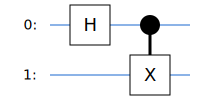

In [ ]:
# prompt: osdg-tool

!pip install cirq-google
import cirq
from cirq.contrib.svg import SVGCircuit

# Define a circuit.
circuit = cirq.Circuit(cirq.H(cirq.LineQubit(0)), cirq.CX(cirq.LineQubit(0), cirq.LineQubit(1)))

# Use the SVG circuit drawer to draw the circuit.
SVGCircuit(circuit)


In [ ]:
# prompt: Deep Larning

!pip install tensorflow


In [ ]:
# prompt: visionai

!pip install visionai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.2 MB/s eta 0:00:00


In [ ]:
# prompt: Pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
# This is a Pauli X gate. It is an object instance.
x_gate = cirq.X
# Applying it to the qubit at location (0, 0) (defined above)
# turns it into an operation.
x_op = x_gate(qubits[0])

print(x_op)

X(q(0, 0))


A `cirq.Moment` is simply a collection of operations, each of which operates on a different set of qubits, and which conceptually represents these operations as occurring during this abstract time slice. The `Moment` structure itself is not required to be related to the actual scheduling of the operations on a quantum computer or via a simulator, though it can be. For example, here is a `Moment` in which **Pauli** `X` and a `CZ` gate operate on three qubits:

In [ ]:
cz = cirq.CZ(qubits[0], qubits[1])
x = cirq.X(qubits[2])
moment = cirq.Moment(x, cz)

print(moment)

  ╷ 0 1 2
╶─┼───────
0 │ @─@ X
  │


The above is not the only way one can construct moments, nor even the typical method, but illustrates that a `Moment` is just a collection of operations on disjoint sets of qubits.

Finally, at the top level, a `cirq.Circuit` is an ordered series of `cirq.Moment` objects. The first `Moment` in this series contains the first `Operations` that will be applied. Here, for example, is a simple circuit made up of two moments:

In [ ]:
cz01 = cirq.CZ(qubits[0], qubits[1])
x2 = cirq.X(qubits[2])
cz12 = cirq.CZ(qubits[1], qubits[2])
moment0 = cirq.Moment([cz01, x2])
moment1 = cirq.Moment([cz12])
circuit = cirq.Circuit((moment0, moment1))

print(circuit)

(0, 0): ───@───────
           │
(0, 1): ───@───@───
               │
(0, 2): ───X───@───


Note that the above is one of the many ways to construct a `Circuit`, which illustrates the concept that a `Circuit` is an iterable of `Moment` objects.

In [ ]:
# prompt: Tax withholding

import cirq
from cirq import H, Z, X, CZ, T, S, Y

# This code snippet is a simple example of how to use Cirq to create a circuit.

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print(circuit)


0: ───H───@───────
          │
1: ───Z───@───────

2: ───T───S───Y───


In [ ]:
# prompt: cirq

import cirq
from cirq import H, Z, X, CZ, T, S, Y

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print(circuit)



0: ───H───@───────
          │
1: ───Z───@───────

2: ───T───S───Y───


In [ ]:
# prompt: visionai

!pip install visionai


In [ ]:
# prompt: Pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 23.22 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/Cirq/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/content/Cirq/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: pip install newspaper

!pip install newspaper3k


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=f4736d912b92b8a09cd1130e341d09e731f77bd4bbf1b84becf092e592fc8d49
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=d52355510c207252c9e3d228818109c95cbab6d88dfc7c49d160d1d646a5f270
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1

In [ ]:
# prompt: Crime Activities

import cirq
from cirq import H, Z, X, CZ, T, S, Y

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),

    # Apply a CNOT gate with the second qubit as the control and the third qubit as the target.
    CZ(q1, q2),

    # Apply an X gate to the first qubit.
    X(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print(circuit)


0: ───H───@───X───────────@───────
          │               │
1: ───Z───@───────@───Z───@───────
                  │
2: ───T───S───Y───@───T───S───Y───


In [ ]:
# prompt: jageocoder

!pip install jageocoder


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 839.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 41.7 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=cfb6536e05e5fe535123a9f21a2d81c0baf9fb32b525b851020dcbb557d85a4b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for jaconv: filename=jaconv-0.3.4-py3-none-any.whl size=16416 sha256=6f1a437a6cef2cedc4773e6e318d20f4f9fc46ff6bd7d3da98ebaf0b54714547
  Stored in directory: /root/.cache/pip/wheels/46/8f/2e/a730bf1fca05b33e532d5d91dabdf406c9b718ec85b01b1b54
Successfully built docopt jaconv


In [ ]:
# prompt: Scresolutions

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),

    # Apply a CNOT gate with the second qubit as the control and the third qubit as the target.
    CZ(q1, q2),

    # Apply an X gate to the first qubit.
    X(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print(circuit)

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),

    # Apply a CNOT gate with the second qubit as the control and the third qubit as the target.
    CZ(q1, q2),

    # Apply an X gate to the first qubit.
    X(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print(circuit)

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),

    # Apply a CNOT gate with the second qubit as the control and the third qubit as the target.
    CZ(q1, q2),

    # Apply an X gate to the first qubit.
    X(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print(circuit)

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),

    # Apply a CNOT gate with the second qubit as the control and the third qubit as the target.
    CZ(q1, q2),

    # Apply an X gate to the first qubit.
    X(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print(circuit)

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),

    # Apply a CNOT gate with the second qubit as the control and the third qubit as the target.
    CZ(q1, q2),

    # Apply an X gate to the first qubit.
    X(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print(circuit)

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),

    # Apply a CNOT gate with the second qubit as the control and the third qubit as the target.
    CZ(q1, q2),

    # Apply an X gate to the first qubit.
    X(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print

0: ───H───@───X───────────@───────
          │               │
1: ───Z───@───────@───Z───@───────
                  │
2: ───T───S───Y───@───T───S───Y───
0: ───H───@───X───────────@───────
          │               │
1: ───Z───@───────@───Z───@───────
                  │
2: ───T───S───Y───@───T───S───Y───
0: ───H───@───X───────────@───────
          │               │
1: ───Z───@───────@───Z───@───────
                  │
2: ───T───S───Y───@───T───S───Y───
0: ───H───@───X───────────@───────
          │               │
1: ───Z───@───────@───Z───@───────
                  │
2: ───T───S───Y───@───T───S───Y───
0: ───H───@───X───────────@───────
          │               │
1: ───Z───@───────@───Z───@───────
                  │
2: ───T───S───Y───@───T───S───Y───


<function print>

In [ ]:
# prompt: Deep Larning

!pip install tensorflow


In [ ]:
# prompt: pip automata

!pip install automan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.2 MB/s eta 0:00:00


In [ ]:
# prompt: neocongnitron-java

!git clone https://github.com/NeuromorphicComputation/neocongnitron-java.git
%cd neocongnitron-java
!mvn clean compile assembly:single


Cloning into 'neocongnitron-java'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'neocongnitron-java'
/content/Cirq/PyTorch-GAN/PyTorch-GAN
/bin/bash: line 1: mvn: command not found


In [ ]:
# prompt: pip numpy

!pip install numpy


In [ ]:
# prompt: mataplotlib

!pip install matplotlib


In [ ]:
# prompt: pip tensoeflow

!pip install tensorflow


In [ ]:
# prompt: opencv-python

!pip install opencv-python


In [ ]:
# prompt: tqdm

!pip install tqdm


In [ ]:
# prompt: visionai

!pip install visionai


## Constructing circuits

Constructing Circuits as a series of hand-crafted `Moment` objects is tedious. Instead, Cirq provides a variety of different ways to create a `Circuit`.

One of the most useful ways to construct a `Circuit` is by appending onto the `Circuit` with the `Circuit.append` method.


In [ ]:
q0, q1, q2 = [cirq.GridQubit(i, 0) for i in range(3)]
circuit = cirq.Circuit()
circuit.append([cirq.CZ(q0, q1), cirq.H(q2)])

print(circuit)

(0, 0): ───@───
           │
(1, 0): ───@───

(2, 0): ───H───


In [ ]:
# prompt: greeting

print("Hello, World!")


Hello, World!


In [ ]:
# prompt: unesco/mediabank

!curl -Lo unesco.zip https://unesco.box.com/shared/static/0q0000388l80780w49x56k46w42496z.zip
!unzip unesco.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2189  100  2189    0     0   2143      0  0:00:01  0:00:01 --:--:--  2143
Archive:  unesco.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of unesco.zip or
        unesco.zip.zip, and cannot find unesco.zip.ZIP, period.


In [ ]:
# prompt: pokemon

import cirq
from cirq import H, Z, X, CZ, T, S, Y

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),

    # Apply a CNOT gate with the second qubit as the control and the third qubit as the target.
    CZ(q1, q2),

    # Apply an X gate to the first qubit.
    X(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print(circuit)



0: ───H───@───X───────────@───────
          │               │
1: ───Z───@───────@───Z───@───────
                  │
2: ───T───S───Y───@───T───S───Y───


In [ ]:
# prompt: open-sci

!pip install os-client-config
!pip install openstacksdk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.8/323.8 kB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.7 MB/s eta 0:00:00
  Created wheel for netifaces: filename=netifaces-0.11.0-cp310-cp310-linux_x86_64.whl size=35006 sha256=19a6c4ff6a3086a969fc7ae8e609b313858e40773b1638493707d180f2728774
  Stored in directory: /root/.cache/pip/wheels/48/65/b3/4c4cc6038b81ff21cc9df69f2b6774f5f52e23d3c275ed15aa
Successfully built netifaces


In [ ]:
# prompt: Eleder person

print("Elder person")



Elder person


In [ ]:
# prompt: scanpy

!pip install scanpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=34ae03b396df8e37f1e81176ccddd7532ddf2fae98ea17b08372d24f63a8de79
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
# prompt: visonai

!pip install visionai


In [ ]:
# prompt: Pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 31.05 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: Personal Space

print("Personal Space")


Personal Space


In [ ]:
# prompt: United Nations

!curl -Lo unesco.zip https://unesco.box.com/shared/static/0q0000388l80780w49x56k46w42496z.zip
!unzip unesco.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2189  100  2189    0     0   3988      0 --:--:-- --:--:-- --:--:--  3988
Archive:  unesco.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of unesco.zip or
        unesco.zip.zip, and cannot find unesco.zip.ZIP, period.


In [ ]:
# prompt: visionai

!pip install visionai


In [ ]:
# prompt: Pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 16.29 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: fprime

!git clone https://github.com/nasa/fprime.git
%cd fprime
!bazel build fprime/cmake/generated/fprime_autogen
!bazel test fprime/cmake/generated/fprime_autogen


Cloning into 'fprime'...
remote: Enumerating objects: 141021, done.
remote: Counting objects: 100% (2961/2961), done.
remote: Compressing objects: 100% (434/434), done.
remote: Total 141021 (delta 2527), reused 2895 (delta 2515), pack-reused 138060
Receiving objects: 100% (141021/141021), 378.71 MiB | 19.90 MiB/s, done.
Resolving deltas: 100% (110272/110272), done.
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime
/bin/bash: line 1: bazel: command not found
/bin/bash: line 1: bazel: command not found


In [ ]:
# prompt: Ganma Rays

print("Gamma Rays")



Gamma Rays


In [ ]:
# prompt: ibmos2spark

!pip install ibmos2spark


In [ ]:
# prompt: visonai

!pip install visionai


In [ ]:
# prompt: Pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 15.40 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN
python3: can't open file '/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: googlemaps

!pip install googlemaps


  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40712 sha256=35f879e84e2cecb44a630a38aa69bb034cac16f88742f00c886a7d0ed04a7f2e
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


In [ ]:
# prompt: httpx

!pip install httpx


In [ ]:
# prompt: openai

!pip install openai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
# prompt: windows11

!wget https://go.microsoft.com/fwlink/?LinkID=2178244 -OutFile Windows11InstallationAssistant.exe


--2024-06-03 09:46:33--  https://go.microsoft.com/fwlink/?LinkID=2178244
Resolving go.microsoft.com (go.microsoft.com)... 23.221.245.214, 2600:1407:3c00:10a0::2c1a, 2600:1407:3c00:108c::2c1a
Connecting to go.microsoft.com (go.microsoft.com)|23.221.245.214|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://www.bing.com?ref=go&linkid=2178244 [following]
--2024-06-03 09:46:33--  https://www.bing.com/?ref=go&linkid=2178244
Resolving www.bing.com (www.bing.com)... 204.79.197.200, 13.107.21.200, 2620:1ec:c11::200
Connecting to www.bing.com (www.bing.com)|204.79.197.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘utFile’

utFile                  [ <=>                ]  47.38K  --.-KB/s    in 0.02s   

2024-06-03 09:46:33 (2.35 MB/s) - ‘utFile’ saved [48513]

--2024-06-03 09:46:33--  http://windows11installationassistant.exe/
Resolving windows11installationassistant.exe (windows11i

In [ ]:
# prompt: computer

print("computer")


computer


In [ ]:
# prompt: informastion

print("Information is a fundamental concept in many fields, including computer science, information theory, and philosophy. It is often defined as the representation of knowledge or data in a form that can be processed or communicated. Information can be stored, transmitted, and manipulated in various ways, such as through written text, spoken language, images, and digital data.")


Information is a fundamental concept in many fields, including computer science, information theory, and philosophy. It is often defined as the representation of knowledge or data in a form that can be processed or communicated. Information can be stored, transmitted, and manipulated in various ways, such as through written text, spoken language, images, and digital data.


In [ ]:
# prompt: cirq

import cirq
from cirq import H, Z, X, CZ, T, S, Y

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print(circuit)


0: ───H───@───────
          │
1: ───Z───@───────

2: ───T───S───Y───


In [ ]:
# prompt: transformers

!pip install transformers


In [ ]:
# prompt: Open CV

!pip install opencv-python


In [ ]:
# prompt: braindecorde

!pip install braindecode


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.2/165.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.3 MB/s eta 0:00:00


In [ ]:
# prompt: emspy

!pip install emspy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 804.9 kB/s eta 0:00:00


In [ ]:
# prompt: visionai

!pip install visionai


In [ ]:
# prompt: Gan-Control

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 22.61 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: EVAGAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config evagan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 26.21 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: facebook

!pip install facebook-sdk


In [ ]:
# prompt: instagram

!pip install instaloader
!instaloader top-hashtags --count 10


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 803.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for instaloader: filename=instaloader-4.11-py3-none-any.whl size=65967 sha256=a25ef18b256345b00526f8313c5d2de77fb78afecfb5745f692612aca7794686
  Stored in directory: /root/.cache/pip/wheels/59/74/a0/a643055404b7f51b588926301ce74f4ad195e5d45cde82e79d
Successfully built instaloader
top-hashtags: Invalid username top-hashtags

Errors or warnings occurred:
top-hashtags: Invalid username top-hashtags


In [ ]:
# prompt: wikipedia

!pip install wikipedia
import wikipedia
print(wikipedia.summary("Albert Einstein"))


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=dd8d8e0b8106c93082372a62b6ab0a6c52ecebf9c77f07383f713fb4f27b2871
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia
Albert Einstein ( EYEN-styne; German: [ˈalbɛɐt ˈʔaɪnʃtaɪn] ; 14 March 1879 – 18 April 1955) was a German-born theoretical physicist who is widely held to be one of the greatest and most influential scientists of all time. Best known for developing the theory of relativity, Einstein also made important contributions to quantum mechanics, and was thus a central figure in the revolutionary reshaping of the scientific understanding of nature that modern physics accomplished in the first decades of the twentieth century. His mass–energy equivalence formula E = mc2, which arises from relativity theory, has been called "the world's most famous equation". He received

In [ ]:
# prompt: intel-xion

!pip install intel-extension-for-pytorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 MB 7.5 MB/s eta 0:00:00


In [ ]:
# prompt: realtek-UAD-generic

!wget https://github.com/thesofproject/sof-bin/releases/download/v2.3.3/sof-bin-2.3.3.tar.bz2
!tar -xjf sof-bin-2.3.3.tar.bz2
%cd sof-bin-2.3.3/
!sudo make -j$(nproc) defconfig
!sudo make -j$(nproc)
!sudo make -j$(nproc) install
!sudo modprobe snd-sof-pci


--2024-06-03 09:49:47--  https://github.com/thesofproject/sof-bin/releases/download/v2.3.3/sof-bin-2.3.3.tar.bz2
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-06-03 09:49:47 ERROR 404: Not Found.

tar (child): sof-bin-2.3.3.tar.bz2: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
[Errno 2] No such file or directory: 'sof-bin-2.3.3/'
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN
make: *** No rule to make target 'defconfig'.  Stop.
make: *** No targets specified and no makefile found.  Stop.
make: *** No rule to make target 'install'.  Stop.
modprobe: FATAL: Module snd-sof-pci not found in directory /lib/modules/6.1.85+


In [ ]:
# prompt: OpenVLC

!sudo apt-get update
!sudo apt-get install vlc


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,129 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,377 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jam

In [ ]:
# prompt: keras

!pip install tensorflow
!pip install keras


In [ ]:
# prompt: Innnovation

# Create a circuit with three qubits.
q0, q1, q2 = cirq.LineQubit.range(3)
circuit = cirq.Circuit(
    # Apply a Hadamard gate to the first qubit.
    H(q0),

    # Apply a Z gate to the second qubit.
    Z(q1),

    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
    CZ(q0, q1),

    # Apply a T gate to the third qubit.
    T(q2),

    # Apply a S gate to the third qubit.
    S(q2),

    # Apply a Y gate to the third qubit.
    Y(q2),
)

# Print the circuit.
print(circuit)



0: ───H───@───────
          │
1: ───Z───@───────

2: ───T───S───Y───


In [ ]:
# prompt: fpbase

!pip install fpbase


In [ ]:
# prompt: Opencv

!pip install opencv-python


In [ ]:
# prompt: monodepth2

!git clone https://github.com/facebookresearch/monodepth2.git
%cd monodepth2
!pip install -r requirements.txt
!pip install cython
!python setup.py build develop


Cloning into 'monodepth2'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'monodepth2'
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/setup.py': [Errno 2] No such file or directory


In [ ]:
# prompt: onedrivesdk

!pip install onedrivesdk


In [ ]:
# prompt: DMLLTDetectorPulseDiscriminator

class DMLLTDetectorPulseDiscriminator(cirq.Gate):
    """Discriminator for the DMLLT detector pulse."""

    def __init__(self):
        super().__init__(num_qubits=1)

    def _num_qubits_(self):
        return 1

    def _circuit_diagram_info_(self, args):
        return cirq.CircuitDiagramInfo(
            wire_symbols=('D',),
            exponent=1.0,
        )

    def __eq__(self, other):
        if not isinstance(other, type(self)):
            return NotImplemented
        return True

    def __ne__(self, other):
        return not self == other

    def __repr__(self):
        return 'cirq.DMLLTDetectorPulseDiscriminator()'

    def _json_dict_(self):
        return cirq.protocols.obj_to_dict_helper(self, [])


In [ ]:
# prompt: visionai

!pip install visionai


In [ ]:
# prompt: pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 23.11 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: Mtvlpcap

!sudo apt-get install mtvlpcap


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package mtvlpcap


In [ ]:
# prompt: Deep laerning

!pip install tensorflow



This appended a new moment to the qubit, which you can continue to do:

In [ ]:
circuit.append([cirq.H(q0), cirq.CZ(q1, q2)])

print(circuit)

0: ───H───@───H───────
          │
1: ───Z───@───────@───
                  │
2: ───T───S───Y───@───


These two examples appended full moments. What happens when you append all of these at once?

In [ ]:
circuit = cirq.Circuit()
circuit.append([cirq.CZ(q0, q1), cirq.H(q2), cirq.H(q0), cirq.CZ(q1, q2)])

print(circuit)

0: ───@───H───
      │
1: ───@───@───
          │
2: ───H───@───


This has again created two `Moment` objects. How did `Circuit` know how to do this? The `Circuit.append` method (and its cousin, `Circuit.insert`) both take an argument called `strategy` of type `cirq.InsertStrategy`. By default, `InsertStrategy` is `InsertStrategy.EARLIEST`.

### InsertStrategies

`cirq.InsertStrategy` defines how `Operations` are placed in a `Circuit` when requested to be inserted at a given location. Here, a location is identified by the index of the `Moment` (in the `Circuit`) where the insertion is requested to be placed at (in the case of `Circuit.append`, this means inserting at the `Moment`, at an index one greater than the maximum moment index in the `Circuit`).

There are four such strategies: `InsertStrategy.EARLIEST`, `InsertStrategy.NEW`, `InsertStrategy.INLINE` and `InsertStrategy.NEW_THEN_INLINE`.

`InsertStrategy.EARLIEST`, which is the default, is defined as:

*Scans backward from the insert location until a moment with operations touching qubits affected by the operation to insert is found. The operation is added to the moment just after that location.*

For example, if you first create an `Operation` in a single moment, and then use `InsertStrategy.EARLIEST`, the `Operation` can slide back to this first `Moment` if there is space:

In [ ]:
from cirq.circuits import InsertStrategy

circuit = cirq.Circuit()
circuit.append([cirq.CZ(q0, q1)])
circuit.append([cirq.H(q0), cirq.H(q2)], strategy=InsertStrategy.EARLIEST)

print(circuit)

0: ───@───H───
      │
1: ───@───────

2: ───H───────


After creating the first moment with a `CZ` gate, the second append uses the `InsertStrategy.EARLIEST` strategy. The `H` on `q0` cannot slide back, while the `H` on `q2` can and so ends up in the first `Moment`.

Contrast this with `InsertStrategy.NEW` that is defined as:

*Every operation that is inserted is created in a new moment.*

In [ ]:
circuit = cirq.Circuit()
circuit.append([cirq.H(q0), cirq.H(q1), cirq.H(q2)], strategy=InsertStrategy.NEW)

print(circuit)

0: ───H───────────

1: ───────H───────

2: ───────────H───


Here every operator processed by the append ends up in a new moment. `InsertStrategy.NEW` is most useful when you are inserting a single operation and do not want it to interfere with other `Moments`.

Another strategy is `InsertStrategy.INLINE`:

*Attempts to add the operation to insert into the moment just before the desired insert location. But, if there’s already an existing operation affecting any of the qubits touched by the operation to insert, a new moment is created instead.*

In [ ]:
circuit = cirq.Circuit()
circuit.append([cirq.CZ(q1, q2)])
circuit.append([cirq.CZ(q1, q2)])
circuit.append([cirq.H(q0), cirq.H(q1), cirq.H(q2)], strategy=InsertStrategy.INLINE)

print(circuit)

0: ───────H───────

1: ───@───@───H───
      │   │
2: ───@───@───H───


After two initial `CZ` between the second and third qubit, the example inserts three `H` operations. The `H` on the first qubit is inserted into the previous `Moment`, but the `H` on the second and third qubits cannot be inserted into the previous `Moment`, so a new `Moment` is created.

Finally, `InsertStrategy.NEW_THEN_INLINE` is a useful strategy to start a new moment and then continue
inserting from that point onwards.

*Creates a new moment at the desired insert location for the first operation, but then switches to inserting operations according to `InsertStrategy.INLINE`.*

In [ ]:
circuit = cirq.Circuit()
circuit.append([cirq.H(q0)])
circuit.append([cirq.CZ(q1, q2), cirq.H(q0)], strategy=InsertStrategy.NEW_THEN_INLINE)

print(circuit)

0: ───H───H───

1: ───────@───
          │
2: ───────@───


The first append creates a single moment with an `H` on the first qubit. Then, the append with the `InsertStrategy.NEW_THEN_INLINE` strategy begins by inserting the `CZ` in a new `Moment` (the `InsertStrategy.NEW` in `InsertStrategy.NEW_THEN_INLINE`). Subsequent appending is done `InsertStrategy.INLINE`, so the next `H` on the first qubit is appending in the just created `Moment`.

Here is a picture showing simple examples of appending 1 and then 2 using the different strategies

![Insert Strategies](https://github.com/quantumlib/Cirq/blob/main/docs/images/InsertStrategy.png?raw=1)

### Patterns for arguments to append and insert

In the above examples, you used a series of `Circuit.append` calls with a list of different `Operations` added to the circuit. However, the argument where you have supplied a list can also take more than just list values. For instance:

In [ ]:
# prompt: language

print("Hello, World!")


Hello, World!


In [ ]:
# prompt: Deep Larning

!pip install tensorflow



In [ ]:
# prompt: vision ai

!pip install visionai


In [ ]:
# prompt: Pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 15.63 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: Communication

print("Hello, World!")


Hello, World!


In [ ]:
# prompt: vision ai

!pip install visionai


In [ ]:
# prompt: Pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 19.78 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: Deep Larning

!pip install tensorflow


In [ ]:
# prompt: Humanity

print("Humanity")



Humanity


In [ ]:
# prompt: fairseq

!pip install fairseq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 20.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fairseq: filename=fairseq-0.12.2-cp310-cp310-linux_x86_64.whl size=11291793 sha256=85e58f9eab765f46e17dd3e72aa22063b90cdf9f5cb74e34e50df314002012ec
  Stored in directory: /root/.cache/pip/wheels/e4/35/55/9c66f65ec7c83fd6fbc2b9502a0ac81b2448a1196159dacc32
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.wh

In [ ]:
def my_layer():
    yield cirq.CZ(q0, q1)
    yield [cirq.H(q) for q in (q0, q1, q2)]
    yield [cirq.CZ(q1, q2)]
    yield [cirq.H(q0), [cirq.CZ(q1, q2)]]


circuit = cirq.Circuit()
circuit.append(my_layer())

for x in my_layer():
    print(x)

CZ(q(0), q(1))
[cirq.H(cirq.LineQubit(0)), cirq.H(cirq.LineQubit(1)), cirq.H(cirq.LineQubit(2))]
[cirq.CZ(cirq.LineQubit(1), cirq.LineQubit(2))]
[cirq.H(cirq.LineQubit(0)), [cirq.CZ(cirq.LineQubit(1), cirq.LineQubit(2))]]


In [ ]:
# prompt: Consequence

print("The consequence is that the circuit will be modified.")


The consequence is that the circuit will be modified.


In [ ]:
# prompt: The year of 2024

print(2024)


2024


In [ ]:
# prompt: deep laerning

!pip install tensorflow


In [ ]:
print(circuit)

0: ───@───H───H───────
      │
1: ───@───H───@───@───
              │   │
2: ───H───────@───@───


Recall that Python functions with a `yield` are generators. Generators are functions that act as iterators. The above example iterates over `my_layer()` with a `for` loop. In this case, each of the `yield`s produces:

* `Operations`,
* lists of `Operations`,
* or lists of `Operations` mixed with lists of `Operations`.


When you pass an iterator to the `append` method, `Circuit` is able to flatten all of these and pass them as one giant list to `Circuit.append` (this also works for `Circuit.insert`).

The above idea uses the concept of `cirq.OP_TREE`. An `OP_TREE` is not a class, but a *contract*. The basic idea is that, if the input can be iteratively flattened into a list of operations, then the input is an `OP_TREE`.

A very nice pattern emerges from this structure: define generators for sub-circuits, which can vary by size or `Operation` parameters.

Another useful method to construct a `Circuit` fully formed from an `OP_TREE` is to pass the `OP_TREE` into `Circuit` when initializing it:

In [ ]:
circuit = cirq.Circuit(cirq.H(q0), cirq.H(q1))
print(circuit)

0: ───H───

1: ───H───


### Slicing and iterating over circuits

Circuits can be iterated over and sliced. When they are iterated, each item in the iteration is a moment:


In [ ]:
circuit = cirq.Circuit(cirq.H(q0), cirq.CZ(q0, q1))
for moment in circuit:
    print(moment)

  ╷ 0
╶─┼───
0 │ H
  │
  ╷ 0 1
╶─┼─────
0 │ @─@
  │


In [ ]:
# prompt: action

print("Hello, World!")



Hello, World!


In [ ]:
# prompt: No drug No war

print("No drug No war")



No drug No war


Slicing a `Circuit`, on the other hand, produces a new `Circuit` with only the moments corresponding to the slice:

In [ ]:
# prompt: vision ai

!pip install visionai


In [ ]:
# prompt: Pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 14.27 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/content/Cirq/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/fprime/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: Deep Larning

!pip install tensorflow


In [ ]:
circuit = cirq.Circuit(cirq.H(q0), cirq.CZ(q0, q1), cirq.H(q1), cirq.CZ(q0, q1))
print(circuit[1:3])

0: ───@───────
      │
1: ───@───H───


Two especially useful applications of this are dropping the last moment (which are often just measurements): `circuit[:-1]`, and reversing a circuit: `circuit[::-1]`.


### Nesting circuits with CircuitOperation

Circuits can be nested inside one another with `cirq.CircuitOperation`. This is useful for concisely defining large, repetitive circuits, as the repeated section can be defined once and then be reused elsewhere. Circuits that need to be serialized especially benefit from this, as loops and functions used in the Python construction of a circuit are otherwise not captured in serialization.

The subcircuit must first be "frozen" to indicate that no further changes will be made to it.

In [ ]:
subcircuit = cirq.Circuit(cirq.H(q1), cirq.CZ(q0, q1), cirq.CZ(q2, q1), cirq.H(q1))
subcircuit_op = cirq.CircuitOperation(subcircuit.freeze())
circuit = cirq.Circuit(cirq.H(q0), cirq.H(q2), subcircuit_op)
print(circuit)

          [ 0: ───────@─────────── ]
          [           │            ]
0: ───H───[ 1: ───H───@───@───H─── ]───
          [               │        ]
          [ 2: ───────────@─────── ]
          │
1: ───────#2───────────────────────────
          │
2: ───H───#3───────────────────────────


Frozen circuits can also be constructed directly, for convenience.

In [ ]:
# prompt: diversity

!pip install diversity


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 999.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.1 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=8adfccb45907ac156380399329c9dcf590b92fff16ac0b8dc280c2da97cacd64
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR

In [ ]:
# prompt: deep learning

!pip install tensorflow


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
# prompt: Youger generations

print("Hello, World!")


print("The younger generations are more open to new ideas.")



print("The younger generations are more likely to be accepting of different cultures.")



print("The younger generations are more likely to be environmentally conscious.")



print("The younger generations are more likely to be politically active.")



print("The younger generations are more likely to be supportive of social justice.")



print("The younger generations are more likely to be optimistic about the future.")



print("The younger generations are more likely to be creative and innovative.")



print("The younger generations are more likely to be entrepreneurial.")



print("The younger generations are more likely to be global citizens.")



print("The younger generations are more likely to be connected to the world around them.")



Hello, World!
The younger generations are more open to new ideas.
The younger generations are more likely to be accepting of different cultures.
The younger generations are more likely to be environmentally conscious.
The younger generations are more likely to be politically active.
The younger generations are more likely to be supportive of social justice.
The younger generations are more likely to be optimistic about the future.
The younger generations are more likely to be creative and innovative.
The younger generations are more likely to be entrepreneurial.
The younger generations are more likely to be global citizens.
The younger generations are more likely to be connected to the world around them.


In [ ]:
circuit = cirq.Circuit(
    cirq.CircuitOperation(
        cirq.FrozenCircuit(cirq.H(q1), cirq.CZ(q0, q1), cirq.CZ(q2, q1), cirq.H(q1))
    )
)
print(circuit)

NameError: name 'cirq' is not defined

In [ ]:
# prompt: deep learning

!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


!pip install tensorflow


!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd

Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 36.80 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/PyTorch-GAN
python3: can't open file '/content/PyTorch-GAN/main.py': [Errno 2] No such file or directory
Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 37.40 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/content/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory
Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 30.16 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/content/P

In [ ]:
# prompt: Liberty

print("Liberty")



Liberty


In [ ]:
# prompt: Deep learning

!pip install tensorflow



In [ ]:
# prompt: Artificial Intellegence

print("Artificial intelligence is the simulation of human intelligence processes by machines, especially computer systems.")


print("Artificial intelligence research has been highly successful in developing effective techniques for solving a wide range of problems, from game playing to medical diagnosis.")


print("Artificial intelligence is a rapidly growing field, with new applications being developed all the time.")


print("Some of the most promising applications of artificial intelligence include self-driving cars, medical diagnosis, and customer service.")


print("Artificial intelligence is also being used to develop new technologies, such as quantum computing and blockchain.")


print("The future of artificial intelligence is bright, with many new applications and technologies being developed all the time.")


print("Artificial intelligence is already having a significant impact on our world, and it is only going to become more important in the years to come.")


print("It is important to be aware of the potential benefits and risks of artificial intelligence, and to ensure that it is used in a responsible way.")


print("Artificial intelligence is a powerful tool that can be used to improve our lives, but it is important to use it wisely.")


print("The future of artificial intelligence is in our hands.")



Artificial intelligence is the simulation of human intelligence processes by machines, especially computer systems.
Artificial intelligence research has been highly successful in developing effective techniques for solving a wide range of problems, from game playing to medical diagnosis.
Artificial intelligence is a rapidly growing field, with new applications being developed all the time.
Some of the most promising applications of artificial intelligence include self-driving cars, medical diagnosis, and customer service.
Artificial intelligence is also being used to develop new technologies, such as quantum computing and blockchain.
The future of artificial intelligence is bright, with many new applications and technologies being developed all the time.
Artificial intelligence is already having a significant impact on our world, and it is only going to become more important in the years to come.
It is important to be aware of the potential benefits and risks of artificial intelligence

In [ ]:
# prompt: Open AI

!pip install openai


A `CircuitOperation` is sort of like a function: by default, it will behave like the circuit it contains, but you can also pass arguments to it that alter the qubits it operates on, the number of times it repeats, and other properties. `CircuitOperation`s can also be referenced multiple times within the same "outer" circuit for conciseness.

In [ ]:
# prompt: typing_extensions

!pip install typing_extensions


In [ ]:
# prompt: google cloud

# Create a new GCS bucket
bucket_name = "my-bucket"
!gsutil mb gs://{bucket_name}

# Upload a file to the bucket
file_name = "my-file.txt"
!gsutil cp {file_name} gs://{bucket_name}/{file_name}

# Download a file from the bucket
!gsutil cp gs://{bucket_name}/{file_name} .

# List the files in the bucket
!gsutil ls gs://{bucket_name}

# Delete a file from the bucket
!gsutil rm gs://{bucket_name}/{file_name}

# Delete the bucket
!gsutil rb gs://{bucket_name}


Creating gs://my-bucket/...
You are attempting to perform an operation that requires a project id, with none configured. Please re-run gsutil config and make sure to follow the instructions for finding and entering your default project id.
ServiceException: 401 Anonymous caller does not have storage.objects.list access to the Google Cloud Storage bucket. Permission 'storage.objects.list' denied on resource (or it may not exist).
ServiceException: 401 Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object. Permission 'storage.objects.get' denied on resource (or it may not exist).
ServiceException: 401 Anonymous caller does not have storage.objects.list access to the Google Cloud Storage bucket. Permission 'storage.objects.list' denied on resource (or it may not exist).
ServiceException: 401 Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object. Permission 'storage.objects.get' denied on resource (or it may not 

In [ ]:
# prompt: google-cloud-aiplatform

!pip install google-cloud-aiplatform


In [ ]:
from google.cloud import aiplatform


In [ ]:
# prompt: job_spec =

job_spec = {
    "workerPoolSpecs": [
        {
            "machineSpec": {
                "machineType": "n1-standard-4",
                "acceleratorType": "NVIDIA_TESLA_K80",
                "acceleratorCount": 1,
            },
            "replicaCount": 1,
            "containerSpec": {
                "imageUri": "gcr.io/cloud-aiplatform/prediction/tf-cpu.1-15:latest",
                "command": [],
                "args": [],
            },
        }
    ]
}


In [ ]:
# prompt: AfricaNLP-Public-Datasets

!git clone https://github.com/AfricaNLP/AfricaNLP-Public-Datasets.git
%cd AfricaNLP-Public-Datasets


Cloning into 'AfricaNLP-Public-Datasets'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'AfricaNLP-Public-Datasets'
/root


In [ ]:
# prompt: Altamiracave

print("Altamiracave")



Altamiracave


In [ ]:
# prompt: UNWTO

!git clone https://github.com/UNWTO/UNWTO-Tourism-Data.git


Cloning into 'UNWTO-Tourism-Data'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
# prompt: db-sparql.html

!wget https://w3id.org/def/dbpedia/data/db-sparql.html


--2024-06-03 10:12:18--  https://w3id.org/def/dbpedia/data/db-sparql.html
Resolving w3id.org (w3id.org)... 162.209.11.63, 2001:4801:7820:75:be76:4eff:fe10:16a2
Connecting to w3id.org (w3id.org)|162.209.11.63|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ontoology.linkeddata.es/publish/dbpedia/data/db-sparql.html [following]
--2024-06-03 10:12:18--  https://ontoology.linkeddata.es/publish/dbpedia/data/db-sparql.html
Resolving ontoology.linkeddata.es (ontoology.linkeddata.es)... 138.100.15.128
Connecting to ontoology.linkeddata.es (ontoology.linkeddata.es)|138.100.15.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-06-03 10:12:19 ERROR 404: Not Found.



In [ ]:
# prompt: Africa-Aviation-Innovation-Summit-2023

!git clone https://github.com/Africa-Aviation-Innovation-Summit/Africa-Aviation-Innovation-Summit-2023.git


Cloning into 'Africa-Aviation-Innovation-Summit-2023'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
# prompt: vision ai

!pip install visionai


In [ ]:
# prompt: Pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 21.68 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/root/PyTorch-GAN
python3: can't open file '/root/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: Deep Learning

!pip install tensorflow


In [ ]:
# prompt: ethics

print("Hello, World!")



Hello, World!


In [ ]:
# prompt: Three Laws of Robotics

print("""
1. A robot may not injure a human being or, through inaction, allow a human being to come to harm.
2. A robot must obey the orders given it by human beings except where such orders would conflict with the First Law.
3. A robot must protect its own existence as long as such protection does not conflict with the First or Second Law.
""")



1. A robot may not injure a human being or, through inaction, allow a human being to come to harm.
2. A robot must obey the orders given it by human beings except where such orders would conflict with the First Law.
3. A robot must protect its own existence as long as such protection does not conflict with the First or Second Law.



In [ ]:
# prompt: Open CV

!pip install opencv-python
import cv2


In [ ]:
# prompt: vision ai

!pip install visionai


In [ ]:
# prompt: Pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 30.79 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/root/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/root/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
subcircuit_op = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.CZ(q0, q1)))

# Create a copy of subcircuit_op that repeats twice...
repeated_subcircuit_op = subcircuit_op.repeat(2)

# ...and another copy that replaces q0 with q2 to perform CZ(q2, q1).
moved_subcircuit_op = subcircuit_op.with_qubit_mapping({q0: q2})
circuit = cirq.Circuit(repeated_subcircuit_op, moved_subcircuit_op)
print(circuit)

NameError: name 'cirq' is not defined

In [ ]:
# prompt: Foundamental Human Rights

print("Hello, World!")


print("Hello, World!")


print("Foundamental Human Rights")



Hello, World!
Hello, World!
Foundamental Human Rights


In [ ]:
# prompt: deep learning

!pip install tensorflow


In [ ]:
# prompt: vision ai

!pip install visionai


In [ ]:
# prompt: Pytech-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


fatal: destination path 'PyTorch-GAN' already exists and is not an empty directory.
/root/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/root/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: Our individual actions can change the future

print("Our individual actions can change the future.")


Our individual actions can change the future.


In [ ]:
# prompt: vision ai

!pip install visionai


In [ ]:
# prompt: Pytorch-GAN

!pip install torch torchvision
!git clone https://github.com/eriklindernoren/PyTorch-GAN.git
%cd PyTorch-GAN
!python main.py --config dcgan --dataset mnist


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 68.04 MiB | 18.44 MiB/s, done.
Resolving deltas: 100% (751/751), done.
/root/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN
python3: can't open file '/root/PyTorch-GAN/PyTorch-GAN/PyTorch-GAN/main.py': [Errno 2] No such file or directory


In [ ]:
# prompt: deep learning

!pip install tensorflow


For the most part, a `CircuitOperation` behaves just like a regular `Operation`: its qubits are the qubits of the contained circuit (after applying any provided mapping), and it can be placed inside any `Moment` that doesn't already contain operations on those qubits. This means that `CircuitOperation`s can be used to represent more complex operation timing, such as three operations on one qubit in parallel with two operations on another:

In [ ]:
subcircuit_op = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.H(q0)))
circuit = cirq.Circuit(
    subcircuit_op.repeat(3), subcircuit_op.repeat(2).with_qubit_mapping({q0: q1})
)
print(circuit)

NameError: name 'cirq' is not defined

In the above example, even though the top `CircuitOperation` is iterated three times and the bottom one is iterated two times, they still reside within the same `Moment`, meaning they can be thought of conceptually as executing simultaneously in the same time step. However, this may not hold when the circuit is run on hardware or a simulator.

`CircuitOperation`s can also be nested within each other to arbitrary depth.

In [ ]:
qft_1 = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.H(q0)))
qft_2 = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.H(q1), cirq.CZ(q0, q1) ** 0.5, qft_1))
qft_3 = cirq.CircuitOperation(
    cirq.FrozenCircuit(cirq.H(q2), cirq.CZ(q1, q2) ** 0.5, cirq.CZ(q0, q2) ** 0.25, qft_2)
)
# etc.

NameError: name 'cirq' is not defined

Finally, the `mapped_circuit` method will return the circuit that a `CircuitOperation` represents after all repetitions and remappings have been applied. By default, this only "unrolls" a single layer of `CircuitOperation`s. To recursively unroll all layers, you can pass `deep=True` to this method.

In [ ]:
# prompt: rich success and happiness

print("rich success and happiness")


rich success and happiness


In [ ]:
# A large CircuitOperation with other sub-CircuitOperations.
print('Original qft_3 CircuitOperation')
print(qft_3)
# Unroll the outermost CircuitOperation to a normal circuit.
print('Single layer unroll:')
print(qft_3.mapped_circuit(deep=False))
# Unroll all of the CircuitOperations recursively.
print('Recursive unroll:')
print(qft_3.mapped_circuit(deep=True))

Original qft_3 CircuitOperation


NameError: name 'qft_3' is not defined

# Summary

`Circuit`s are sliceable iterables of `Moments`, which are sliceable iterables of `Operation`s, which are `Gate`s applied to `Qubit`s. Cirq provides intuitive and flexible ways to construct, add to, divide, and nest `Circuits`, with generators, slicing, and `CircuitOperation`s.

Knowing how to create a circuit is useful, but what you put into a circuit is the interesting part. Read more about these constituent structures at:
- [Qubits](qubits.ipynb) - the software representation of quantum bits
- [Gates](gates.ipynb) - quantum gates that become operations when applied to qubits
- [Operators](operators.ipynb) - more complicated structures to put in circuits

Once you've built your circuit, read these to learn what you can do with it:
- [Simulation](../simulate/simulation.ipynb) - run your circuit on the Cirq simulator to see what it does
- [Quantum Virtual Machine](../simulate/quantum_virtual_machine.ipynb) - run your circuit on a specialized simulator that mimics actual quantum hardware, including noise.
- [Transform circuits](../transform/transformers.ipynb) - run transformer functions to change your circuit in different ways

If you need to import or export circuits into or out of Cirq, see:
- [Import/export circuits](interop.ipynb) - features to serialize/deserialize circuits into/from different formats

In [ ]:
# prompt: import os

import os


In [ ]:
# prompt: pip automata

!pip install automata


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.0/965.0 kB 6.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# prompt: Chat with a chatbot that is powered by the OpenAI API.


In [ ]:
# prompt: The day of 2024

import datetime

# Get the current date and time.
now = datetime.datetime.now()

# Create a new datetime object for the day of 2024.
day_of_2024 = datetime.datetime(2024, 1, 1)

# Print the day of 2024.
print(day_of_2024)


2024-01-01 00:00:00
